In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

matplotlib.style.use('ggplot') # Look Pretty

In [2]:
def showandtell(title=None):
  if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
  plt.show()
  exit()

In [3]:
#
# INFO: This dataset has call records for 10 users tracked over the course of 3 years.
# Your job is to find out where the users likely live and work at!

In [4]:
#
# TODO: Load up the dataset and take a peek at its head
# Convert the date using pd.to_datetime, and the time using pd.to_timedelta
df = pd.read_csv('Datasets/CDR.csv')
df.head()

df.CallDate = pd.to_datetime(df.CallDate, errors='coerce')
df.CallTime = pd.to_timedelta(df.CallTime, errors='coerce')
df.dtypes

In                     int64
Out                    int64
Direction             object
CallDate      datetime64[ns]
CallTime     timedelta64[ns]
DOW                   object
Duration              object
TowerID               object
TowerLat             float64
TowerLon             float64
dtype: object

In [5]:
#
# TODO: Get a distinct list of "In" phone numbers (users) and store the values in a
# regular python list.
# Hint: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html
#
in_numbers = df['In'].unique().tolist()
in_numbers

[4638472273,
 1559410755,
 4931532174,
 2419930464,
 1884182865,
 3688089071,
 4555003213,
 2068627935,
 2894365987,
 8549533077]

In [26]:
# 
# TODO: Create a slice called user1 that filters to only include dataset records where the
# "In" feature (user phone number) is equal to the first number on your unique list above
#
user1 = df[df['In'] == in_numbers[0]]
len(user1)

3648

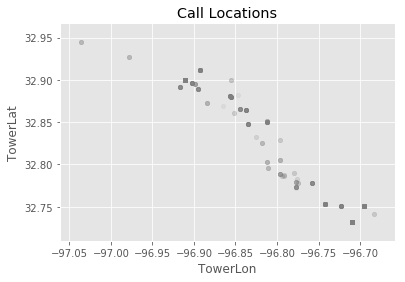

In [27]:
# INFO: Plot all the call locations
user1.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
# showandtell()  # Comment this line out when you're ready to proceed

In [28]:
#
# TODO: Add more filters to the user1 slice you created. Add bitwise logic so that you're
# only examining records that came in on weekends (sat/sun).
#
user1 = user1[(user1['DOW']=='Sat') | (user1['DOW']=='Sun')]
len(user1)

1141

In [31]:
#
# TODO: Further filter it down for calls that are came in either before 6AM OR after 10pm (22:00:00).
# You can use < and > to compare the string times, just make sure you code them as military time
# strings, eg: "06:00:00", "22:00:00": https://en.wikipedia.org/wiki/24-hour_clock
#
# You might also want to review the Data Manipulation section for this. Once you have your filtered
# slice, print out its length:
#
user1 = user1[(user1['CallTime']<'06:00:00') | (user1['CallTime']>'22:00:00')]
len(user1)

28

Text(0.5,1,'Weekend Calls (<6am or >10p)')

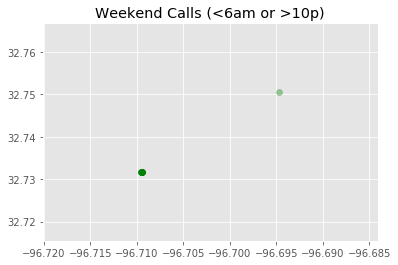

In [32]:
#
# INFO: Visualize the dataframe with a scatter plot as a sanity check. Since you're familiar
# with maps, you know well that your X-Coordinate should be Longitude, and your Y coordinate
# should be the tower Latitude. Check the dataset headers for proper column feature names.
# https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude
#
# At this point, you don't yet know exactly where the user is located just based off the cell
# phone tower position data; but considering the below are for Calls that arrived in the twilight
# hours of weekends, it's likely that wherever they are bunched up is probably near where the
# caller's residence:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
# showandtell()  # TODO: Comment this line out when you're ready to proceed


In [33]:
#
# TODO: Run K-Means with a K=1. There really should only be a single area of concentration. If you
# notice multiple areas that are "hot" (multiple areas the usr spends a lot of time at that are FAR
# apart from one another), then increase K=2, with the goal being that one of the centroids will
# sweep up the annoying outliers; and the other will zero in on the user's approximate home location.
# Or rather the location of the cell tower closest to their home.....
#
# Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other
# data is suitable for your purposes. Since both Lat and Lon are (approximately) on the same scale,
# no feature scaling is required. Print out the centroid locations and add them onto your scatter
# plot. Use a distinguishable marker and color.
#
# Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.
#
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1)
arrs = user1[['TowerLat', 'TowerLon']]
kmeans.fit(arrs)

centroids = kmeans.cluster_centers_
centroids

# showandtell()  # TODO: Comment this line out when you're ready to proceed

,In,Out,Direction,CallDate,CallTime,DOW,Duration,TowerID,TowerLat,TowerLon
940,4638472273,6150928001,Incoming,2011-01-08,22:22:33.693878,Sat,0:00:35.065912,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
1875,4638472273,2145623768,Incoming,2011-01-22,22:21:27.466908,Sat,0:03:40.018320,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
6949,4638472273,5621270003,Missed,2011-04-09,22:59:23.206408,Sat,0:03:06.567364,2567c73b-3711-4a31-8683-9d12d56857d8,32.731611,-96.709417
7468,4638472273,7756914135,Incoming,2011-04-17,05:15:40.205917,Sun,0:02:09.984993,cd9f3b1a-2eb8-4cdb-86d1-5d4c2740b1dc,32.731722,-96.709500
9753,4638472273,7922223441,Incoming,2011-05-21,05:08:20.121145,Sat,0:01:30.059591,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,32.731611,-96.709417
13951,4638472273,7428841195,Missed,2011-07-23,22:56:02.014834,Sat,0:04:48.497077,26f7441e-e64b-4b9d-8c5a-0eb34f7e919f,32.731611,-96.709417
17515,4638472273,2666307251,Incoming,2011-09-11,05:44:15.432523,Sun,0:01:39.500414,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417
21638,4638472273,6150928001,Incoming,2011-11-13,05:10:41.954161,Sun,0:00:44.369613,f3f289f5-7d29-4d3f-9b9a-a0ceaca10a1d,32.750556,-96.694722
22045,4638472273,6022767590,Missed,2011-11-19,22:59:53.166951,Sat,0:00:05.795265,8ba7e0d7-eb6e-4828-9c70-c469954a627d,32.731611,-96.709417
22502,4638472273,5621270003,Incoming,2011-11-26,22:10:48.879076,Sat,0:03:07.592270,bcec0121-164d-406c-8c04-d12870893992,32.731611,-96.709417


Predict location of call in number: 4638472273

Predicted centroid:  [[ 32.73299989 -96.70839404]]
-------------------------------------------
Predict location of call in number: 1559410755

Predicted centroid:  [[ 32.87097035 -96.92355165]]
-------------------------------------------
Predict location of call in number: 4931532174

Predicted centroid:  [[ 32.86557287 -96.86526087]]
-------------------------------------------
Predict location of call in number: 2419930464

Predicted centroid:  [[ 32.84688271 -96.83577361]]
-------------------------------------------
Predict location of call in number: 1884182865

Predicted centroid:  [[ 32.87684057 -96.73155696]]
-------------------------------------------
Predict location of call in number: 3688089071

Predicted centroid:  [[ 32.770833 -96.685556]]
-------------------------------------------
Predict location of call in number: 4555003213

Predicted centroid:  [[ 32.70437017 -96.84065775]]
-------------------------------------------
Pre

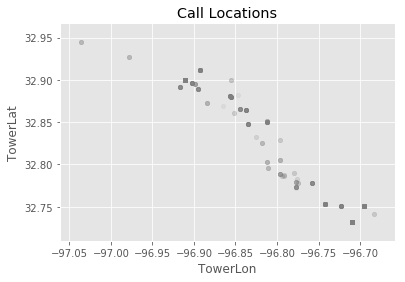

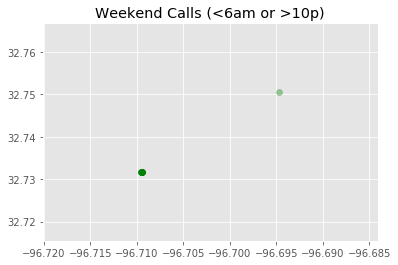

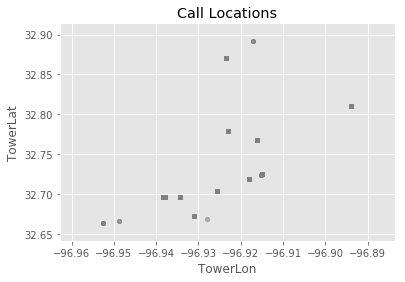

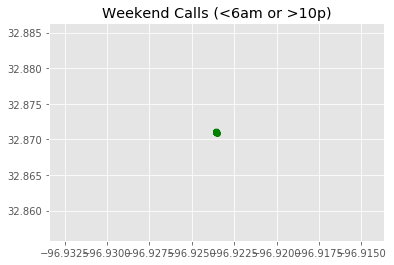

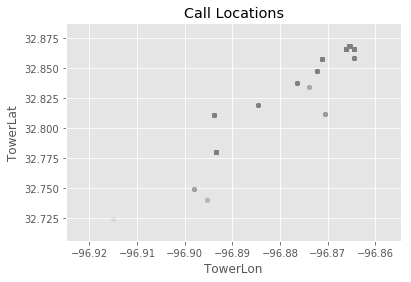

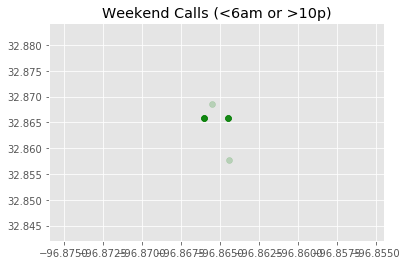

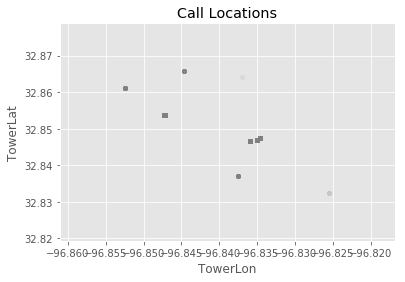

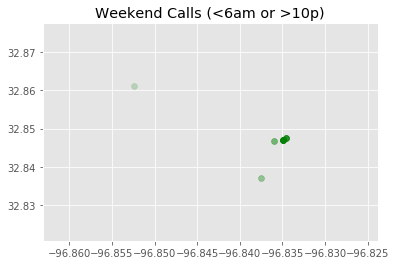

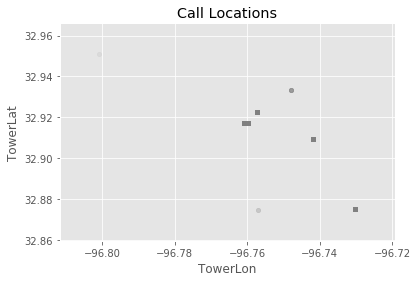

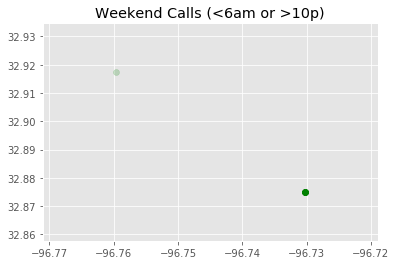

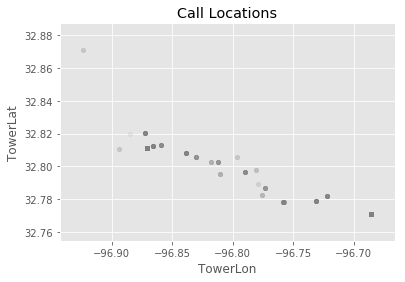

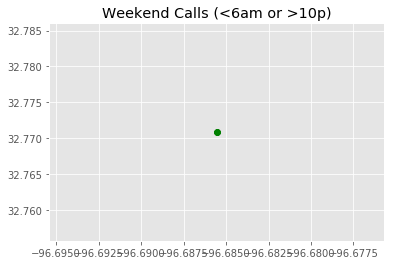

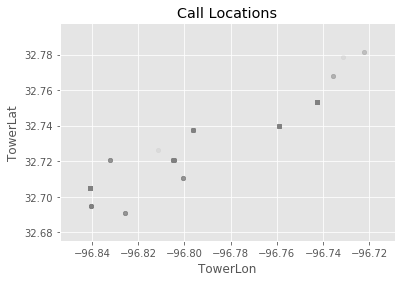

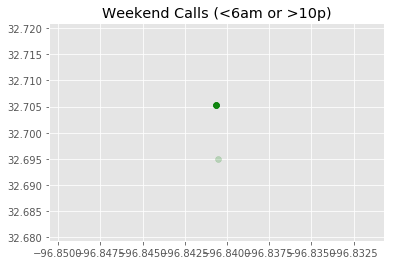

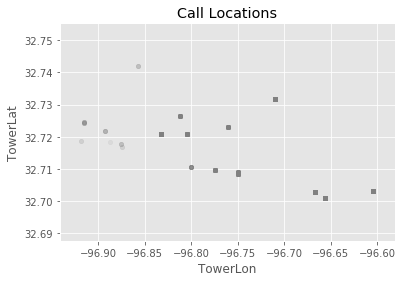

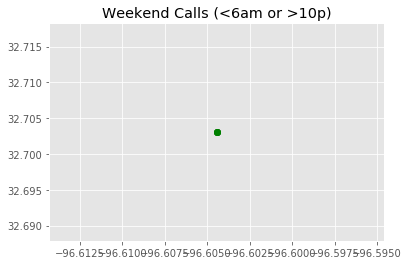

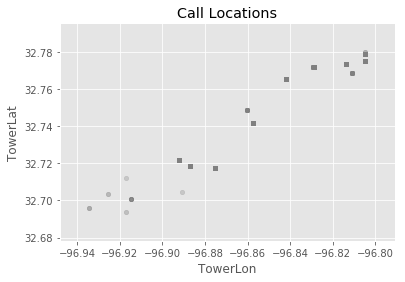

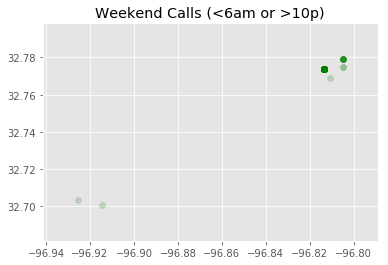

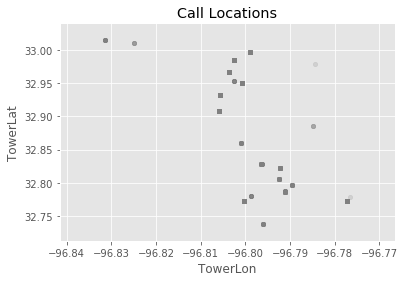

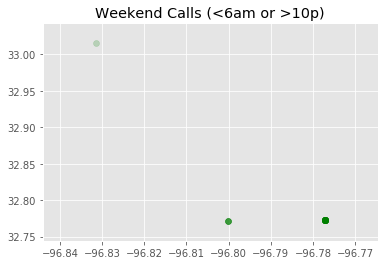

In [37]:
#
# TODO: Repeat the above steps for all 10 individuals, being sure to record their approximate home
# locations. You might want to use a for-loop, unless you enjoy typing.
#
for number in in_numbers:
    print('Predict location of call in number: ' + str(number) + '\n')
    user = df[df['In'] == number]
    user.plot.scatter(x='TowerLon', y='TowerLat', c='gray', alpha=0.1, title='Call Locations')
    user = user[(user['DOW']=='Sat') | (user['DOW']=='Sun')]
    user = user[(user['CallTime']<'06:00:00') | (user['CallTime']>'22:00:00')]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(user.TowerLon,user.TowerLat, c='g', marker='o', alpha=0.2)
    ax.set_title('Weekend Calls (<6am or >10p)')
    
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=1)
    arrs = user[['TowerLat', 'TowerLon']]
    kmeans.fit(arrs)

    centroids = kmeans.cluster_centers_
    print('Predicted centroid: ', centroids)
    print('-------------------------------------------')